# EDA

### 필요 패키지

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### 파일 불러오기

In [2]:
df = pd.read_csv("./Data/train_col.csv")
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,GroupCount,CabinGrade,CabinLoc,Underage
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,B,P,0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,1,F,S,0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,2,A,S,0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,2,A,S,0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1,F,S,1


### 숫자데이터를 제외한 컬럼들과 타겟컬럼의 barplot

<AxesSubplot:xlabel='VIP', ylabel='Transported'>

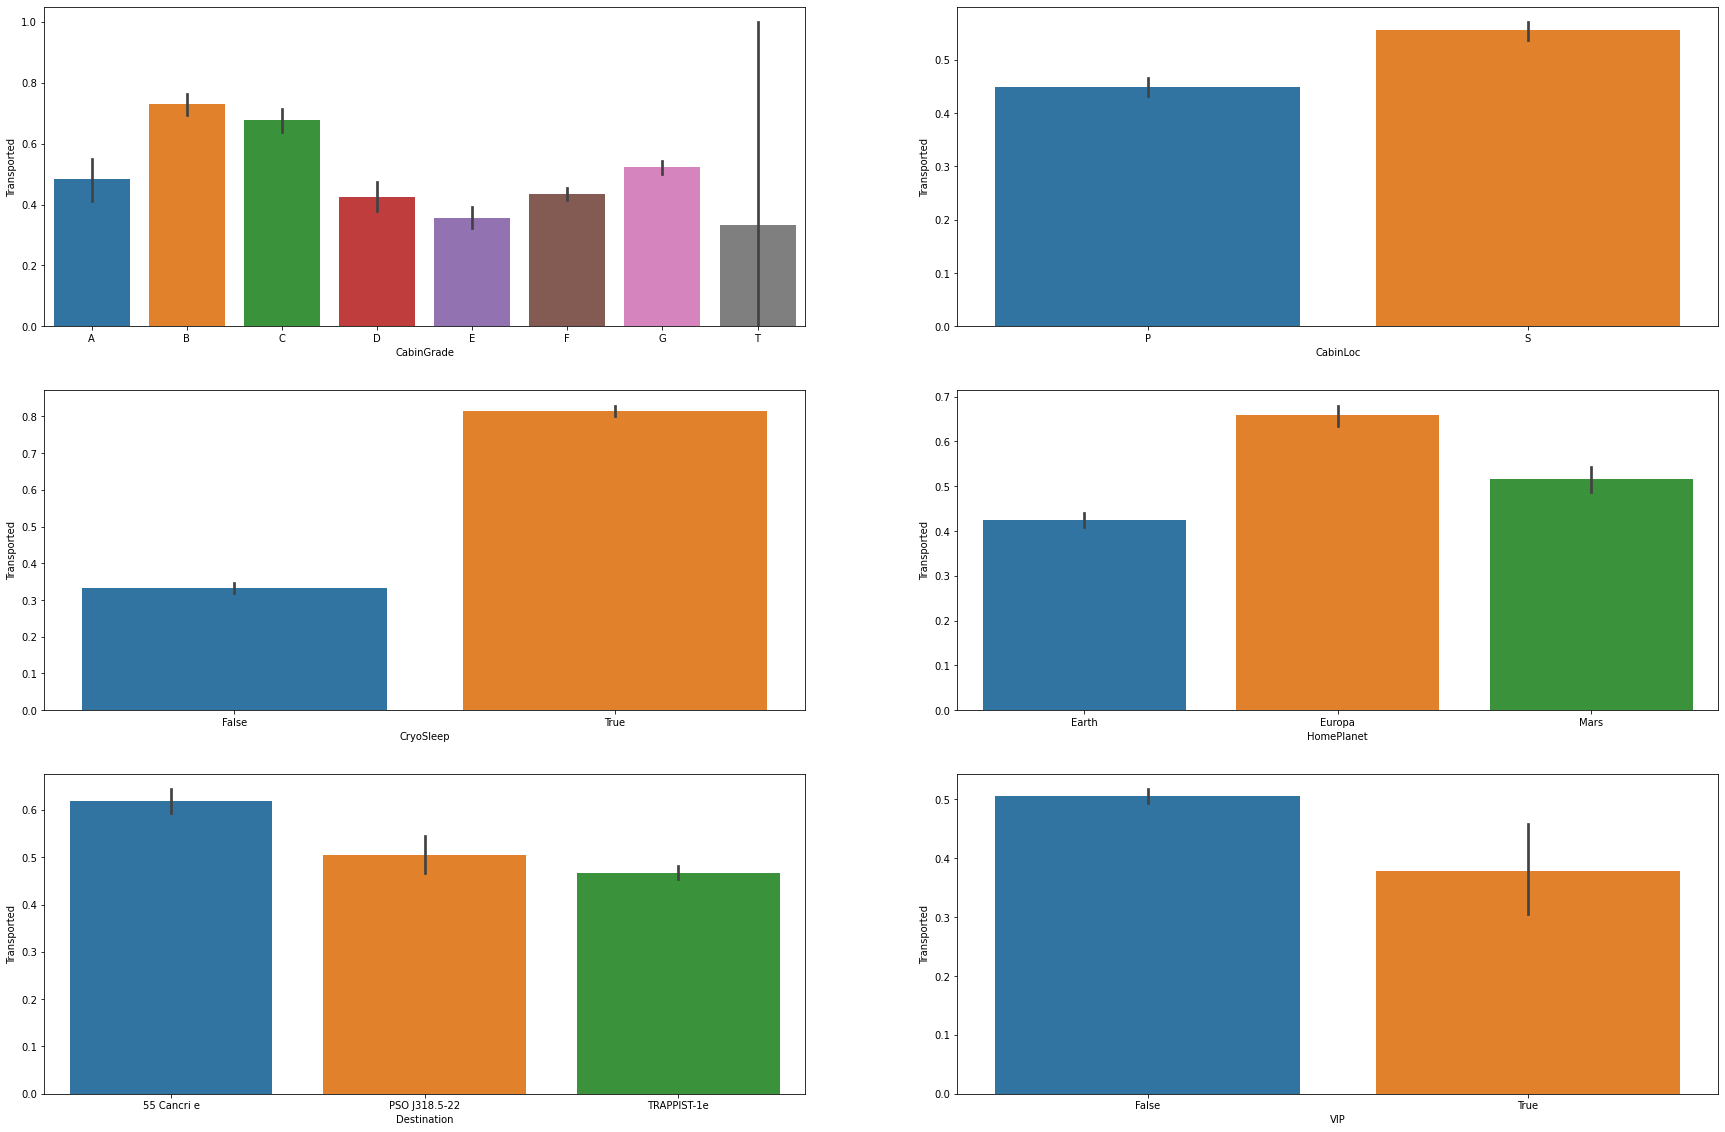

In [3]:
fig = plt.figure(figsize=(30,20))

ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)

sns.barplot("CabinGrade", "Transported", data=df.sort_values("CabinGrade"), ax=ax1)
sns.barplot("CabinLoc", "Transported", data=df.sort_values("CabinLoc") ,ax=ax2)
sns.barplot("CryoSleep", "Transported", data=df.sort_values("CryoSleep") ,ax=ax3)
sns.barplot("HomePlanet", "Transported", data=df.sort_values("HomePlanet") ,ax=ax4)
sns.barplot("Destination", "Transported", data=df.sort_values("Destination") ,ax=ax5)
sns.barplot("VIP", "Transported", data=df.sort_values("VIP") ,ax=ax6)



- 생각보다 CryoSleep과 CabinGrade를 제외하고는 이동할 확률 차이가 크지 않음
- Feature Column으로서의 이용가치가 있는가?

<AxesSubplot:xlabel='CabinGrade', ylabel='Transported'>

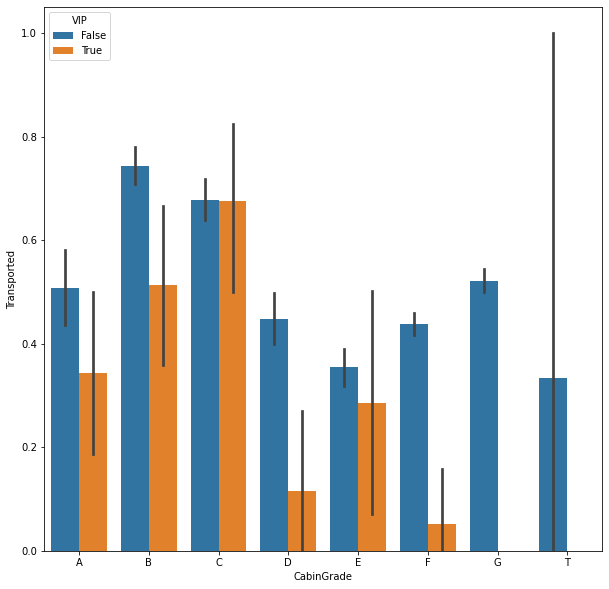

In [4]:
plt.figure(figsize=(10,10))
sns.barplot("CabinGrade", "Transported", hue="VIP", data=df.sort_values("CabinGrade"))

In [5]:
np.unique(df["CabinGrade"], return_counts=True)

(array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'], dtype=object),
 array([ 213,  641,  599,  381,  700, 2208, 2019,    3], dtype=int64))

In [6]:
# 객실 등급이 T인 경우는 샘플이 3개밖에 없기 때문에 구분이 가능할까?
df[df["CabinGrade"] == "T"]

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,GroupCount,CabinGrade,CabinLoc,Underage
1729,Europa,False,TRAPPIST-1e,42.0,False,0.0,1829.0,2.0,3133.0,2447.0,False,1,T,P,0
2095,Europa,False,TRAPPIST-1e,33.0,False,0.0,28.0,0.0,6841.0,543.0,False,1,T,P,0
2116,Europa,False,TRAPPIST-1e,38.0,False,0.0,3135.0,0.0,26.0,3.0,True,1,T,P,0


### 숫자 데이터로 이루어진 컬럼들의 분포 확인

Text(0.5, 1.0, 'VRDeck')

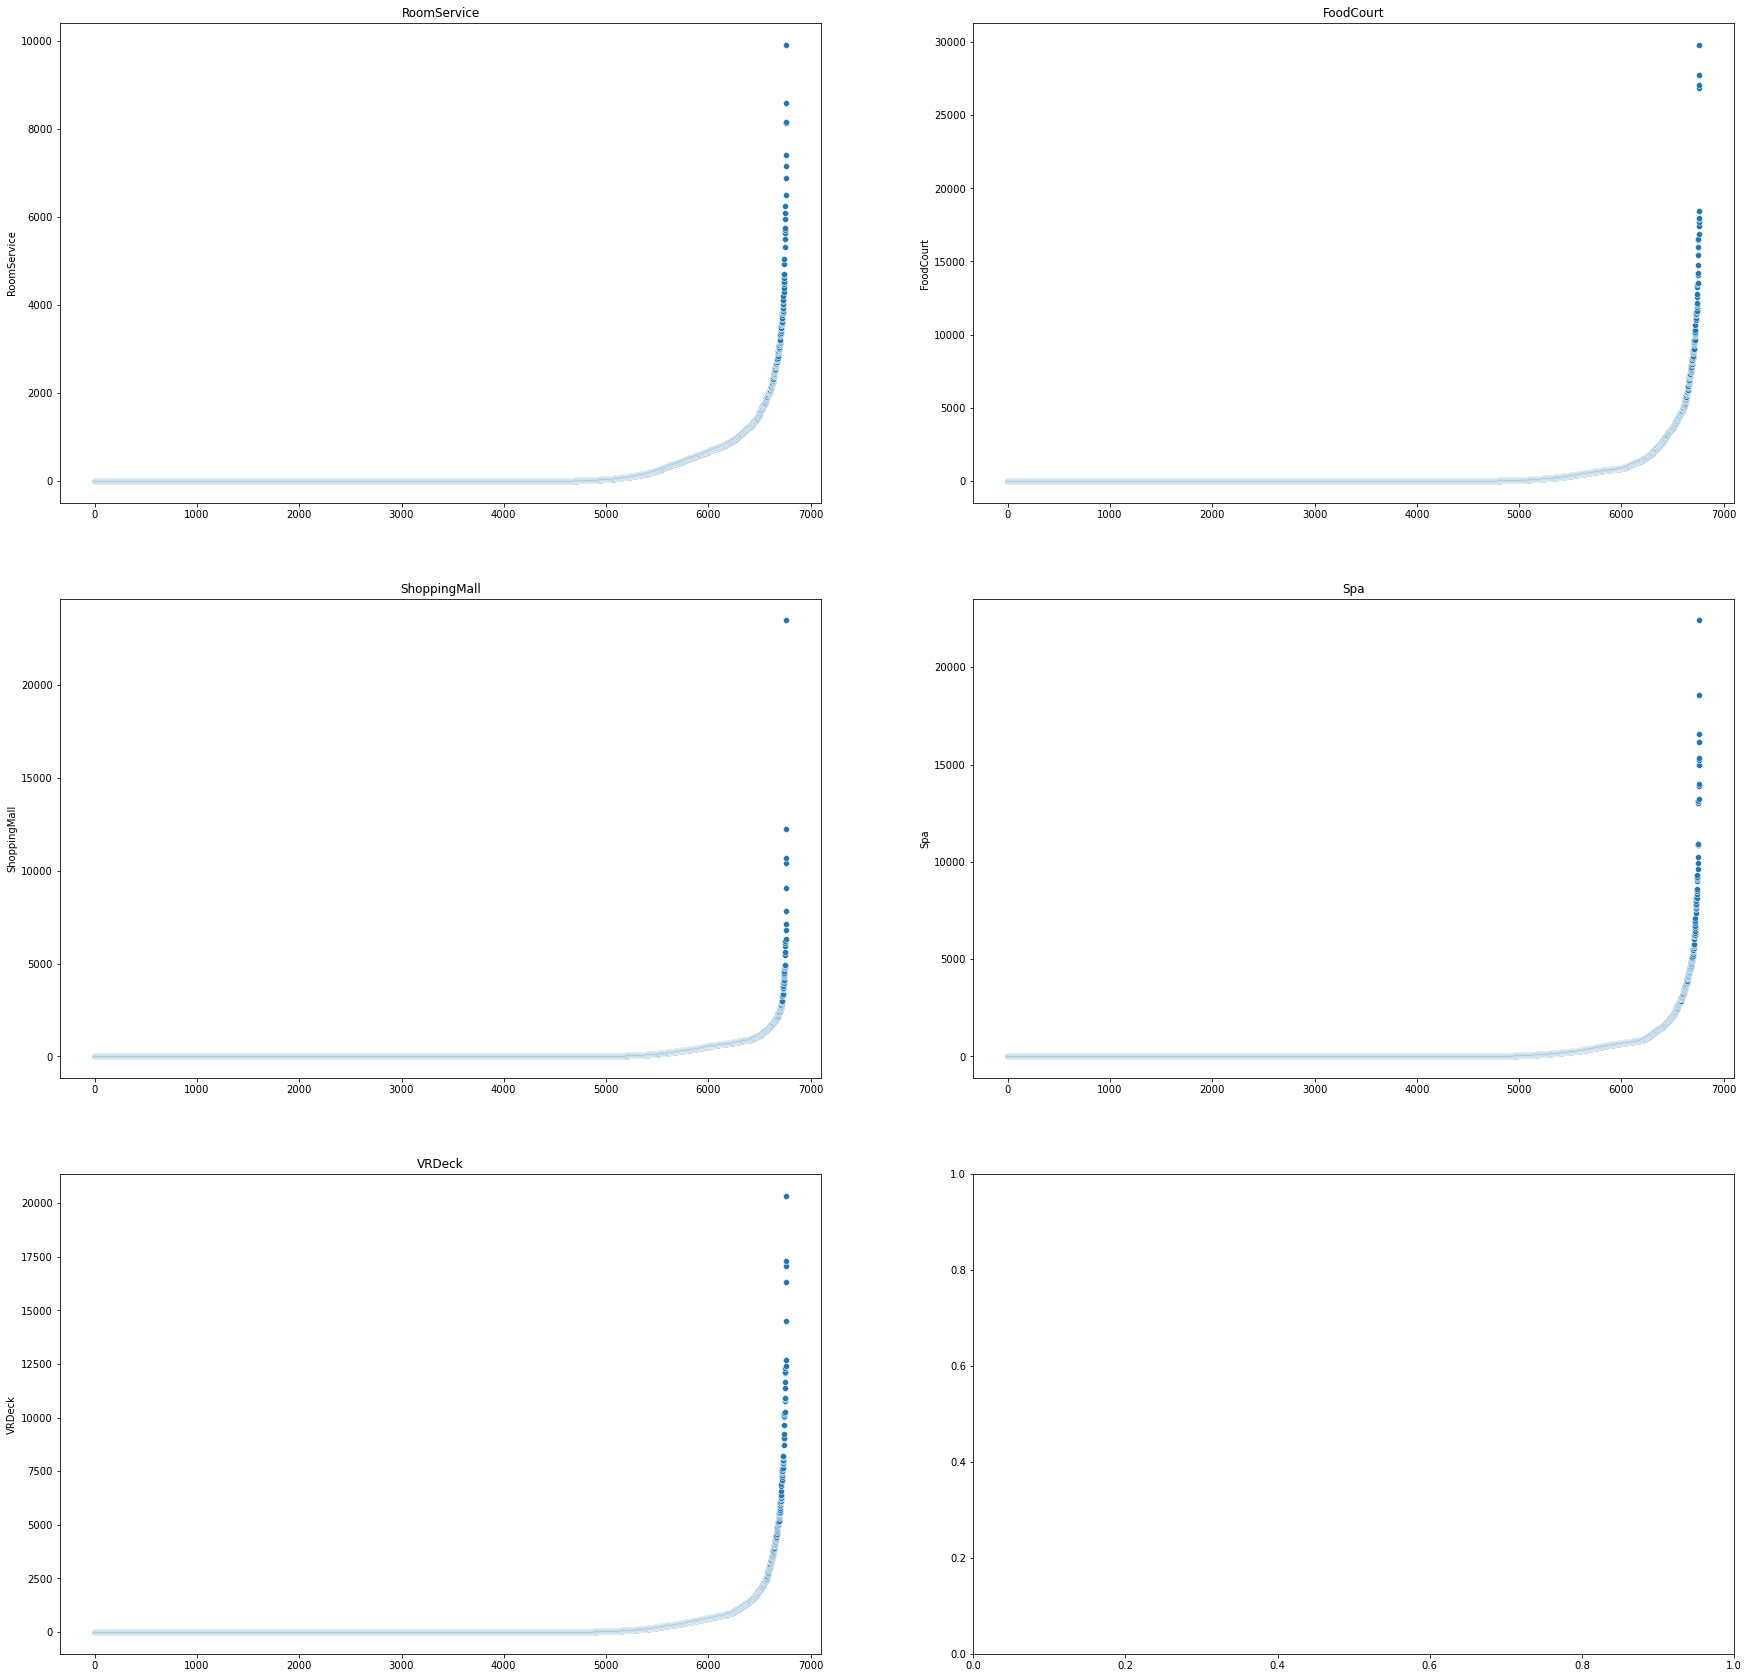

In [7]:
fig = plt.figure(figsize=(30,30))

ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)

sns.scatterplot(np.arange(0,len(df)),df.sort_values("RoomService")["RoomService"], ax = ax1)
sns.scatterplot(np.arange(0,len(df)),df.sort_values("FoodCourt")["FoodCourt"], ax = ax2)
sns.scatterplot(np.arange(0,len(df)),df.sort_values("ShoppingMall")["ShoppingMall"], ax = ax3)
sns.scatterplot(np.arange(0,len(df)),df.sort_values("Spa")["Spa"], ax = ax4)
sns.scatterplot(np.arange(0,len(df)),df.sort_values("VRDeck")["VRDeck"], ax = ax5)

ax1.set_title("RoomService")
ax2.set_title("FoodCourt")
ax3.set_title("ShoppingMall")
ax4.set_title("Spa")
ax5.set_title("VRDeck")

- 전반적으로 0이 많기 때문에 분포가 극단적임 --> Feature Column으로서의 가치 있음

In [8]:
temp = df[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "Transported"]]
temp.head()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0.0,0.0,0.0,0.0,0.0,False
1,109.0,9.0,25.0,549.0,44.0,True
2,43.0,3576.0,0.0,6715.0,49.0,False
3,0.0,1283.0,371.0,3329.0,193.0,False
4,303.0,70.0,151.0,565.0,2.0,True


### 숫자로 이루어진 Feature Column들의 Target Column에 따른 분포 확인

In [9]:
for col in temp.drop("Transported", axis=1).columns:
    print(f"-----------{col}------------")
    print(temp.loc[temp["Transported"], col].describe() , temp.loc[temp["Transported"] == False, col].describe())

-----------RoomService------------
count    3401.000000
mean       64.738312
std       281.691640
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      3992.000000
Name: RoomService, dtype: float64 count    3363.000000
mean      385.897116
std       844.216930
min         0.000000
25%         0.000000
50%         1.000000
75%       467.500000
max      9920.000000
Name: RoomService, dtype: float64
-----------FoodCourt------------
count     3401.000000
mean       569.525434
std       2021.356488
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max      29813.000000
Name: FoodCourt, dtype: float64 count     3363.000000
mean       388.932501
std       1228.124192
min          0.000000
25%          0.000000
50%          0.000000
75%        180.000000
max      16856.000000
Name: FoodCourt, dtype: float64
-----------ShoppingMall------------
count     3401.000000
mean       190.010291
std        765.304960
min       

- FoodCourt와 ShoppingMall을 제외하고는 대부분 Target이 False인 경우가 상대적으로 평균값이 높음 --> 의미가 있는 정보인가?

### 각 숫자 Feature Column들의 평균보다 높은 값을 가지는 값들에 대한 Target Column의 분포

In [10]:
for col in temp.drop("Transported", axis=1).columns:
    print(f"-----{col}------")
    print(np.unique(temp.loc[temp[col] >= temp[col].mean(), "Transported"], return_counts=True))

-----RoomService------
(array([False,  True]), array([1047,  235], dtype=int64))
-----FoodCourt------
(array([False,  True]), array([596, 558], dtype=int64))
-----ShoppingMall------
(array([False,  True]), array([714, 491], dtype=int64))
-----Spa------
(array([False,  True]), array([958, 197], dtype=int64))
-----VRDeck------
(array([False,  True]), array([924, 244], dtype=int64))


- FoodCourt를 제외한 나머지 Column들은 전부 Target Column이 True인 경우의 비율이 훨씬 적다
- ShoppingMall 역시 Target Column이 True인 비율이 적지만 다른 Column들과 비교하면 True와 False의 차이가 크지 않다

### 각 숫자 Feature Column들의 0값을 가지는 경우 Target Column의 분포

In [11]:
for col in temp.drop("Transported", axis=1).columns:
    print(f"-----{col}------")
    print(np.unique(temp.loc[temp[col] == 0, "Transported"], return_counts=True))

-----RoomService------
(array([False,  True]), array([1643, 2778], dtype=int64))
-----FoodCourt------
(array([False,  True]), array([1792, 2546], dtype=int64))
-----ShoppingMall------
(array([False,  True]), array([1780, 2655], dtype=int64))
-----Spa------
(array([False,  True]), array([1520, 2685], dtype=int64))
-----VRDeck------
(array([False,  True]), array([1624, 2713], dtype=int64))


- 위와는 반대로 0인 경우는 모든 Column이 전부 Target Column이 True인 경우가 더 많다

In [12]:
temp["FoodCourt"]

0          0.0
1          9.0
2       3576.0
3       1283.0
4         70.0
         ...  
6759    6819.0
6760       0.0
6761       0.0
6762    1049.0
6763    4688.0
Name: FoodCourt, Length: 6764, dtype: float64

### FoodCourt와 RoomService의 비교

Text(0.5, 1.0, 'RoomService_Transported_False')

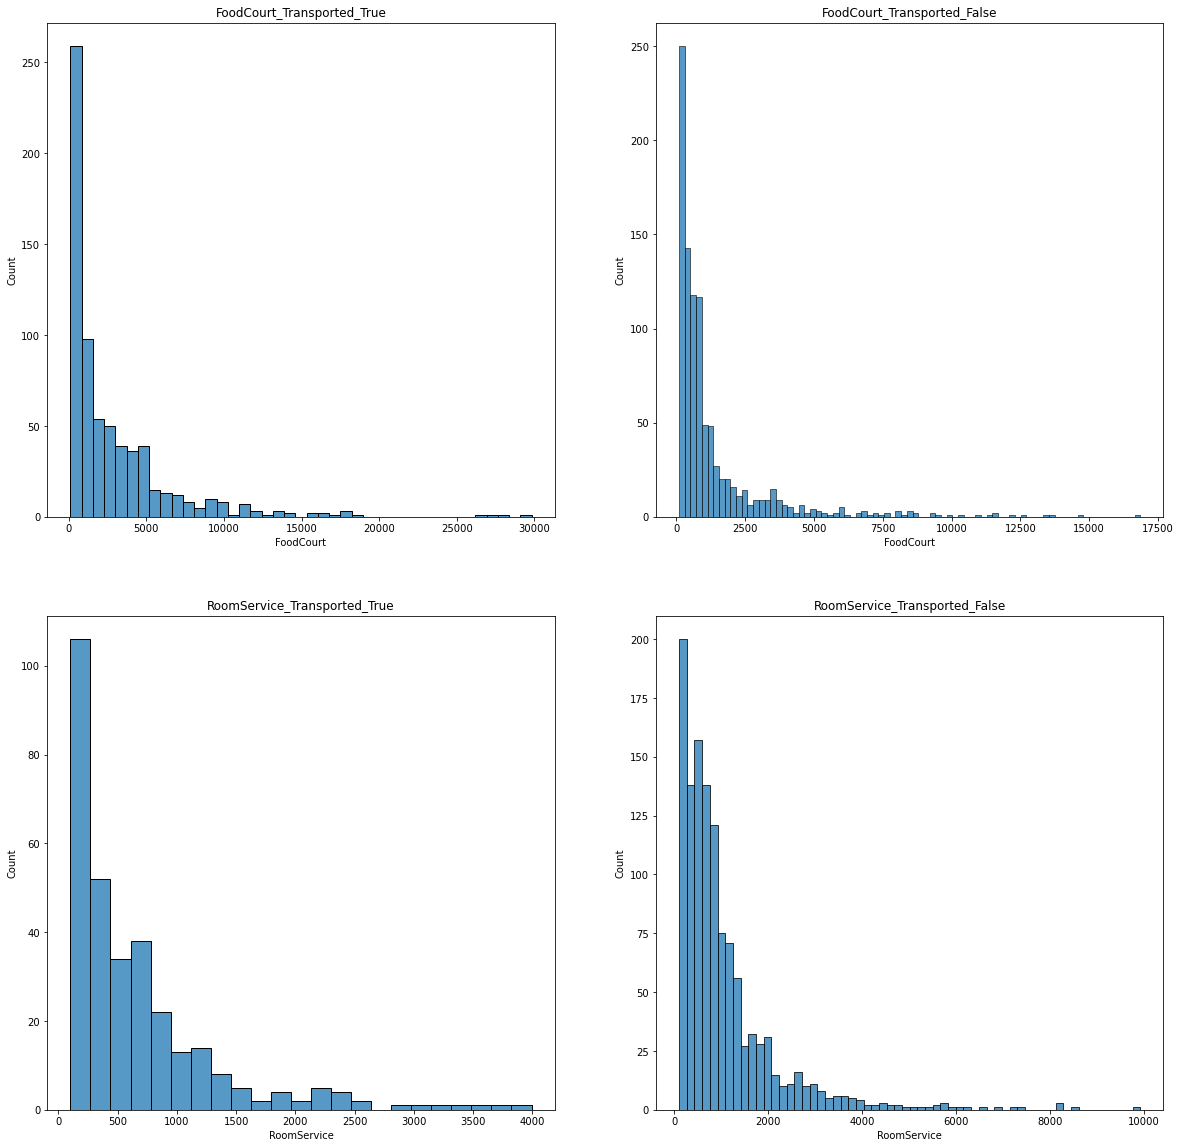

In [13]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

sns.histplot(temp.loc[(temp["FoodCourt"] >= 100) & (temp["Transported"] == True), "FoodCourt"], ax=ax1)
sns.histplot(temp.loc[(temp["FoodCourt"] >= 100) & (temp["Transported"] == False), "FoodCourt"], ax=ax2)

sns.histplot(temp.loc[(temp["RoomService"] >= 100) & (temp["Transported"] == True), "RoomService"], ax=ax3)
sns.histplot(temp.loc[(temp["RoomService"] >= 100) & (temp["Transported"] == False), "RoomService"], ax=ax4)

ax1.set_title("FoodCourt_Transported_True")
ax2.set_title("FoodCourt_Transported_False")
ax3.set_title("RoomService_Transported_True")
ax4.set_title("RoomService_Transported_False")

- 비교결과로 얘기할만한 내용은 찾지 못함 --> 추가적으로 생각해볼것!

### 숫자 컬럼들을 제외하고 문자 컬럼들과 파생 컬럼들의 Target Column 비율 확인

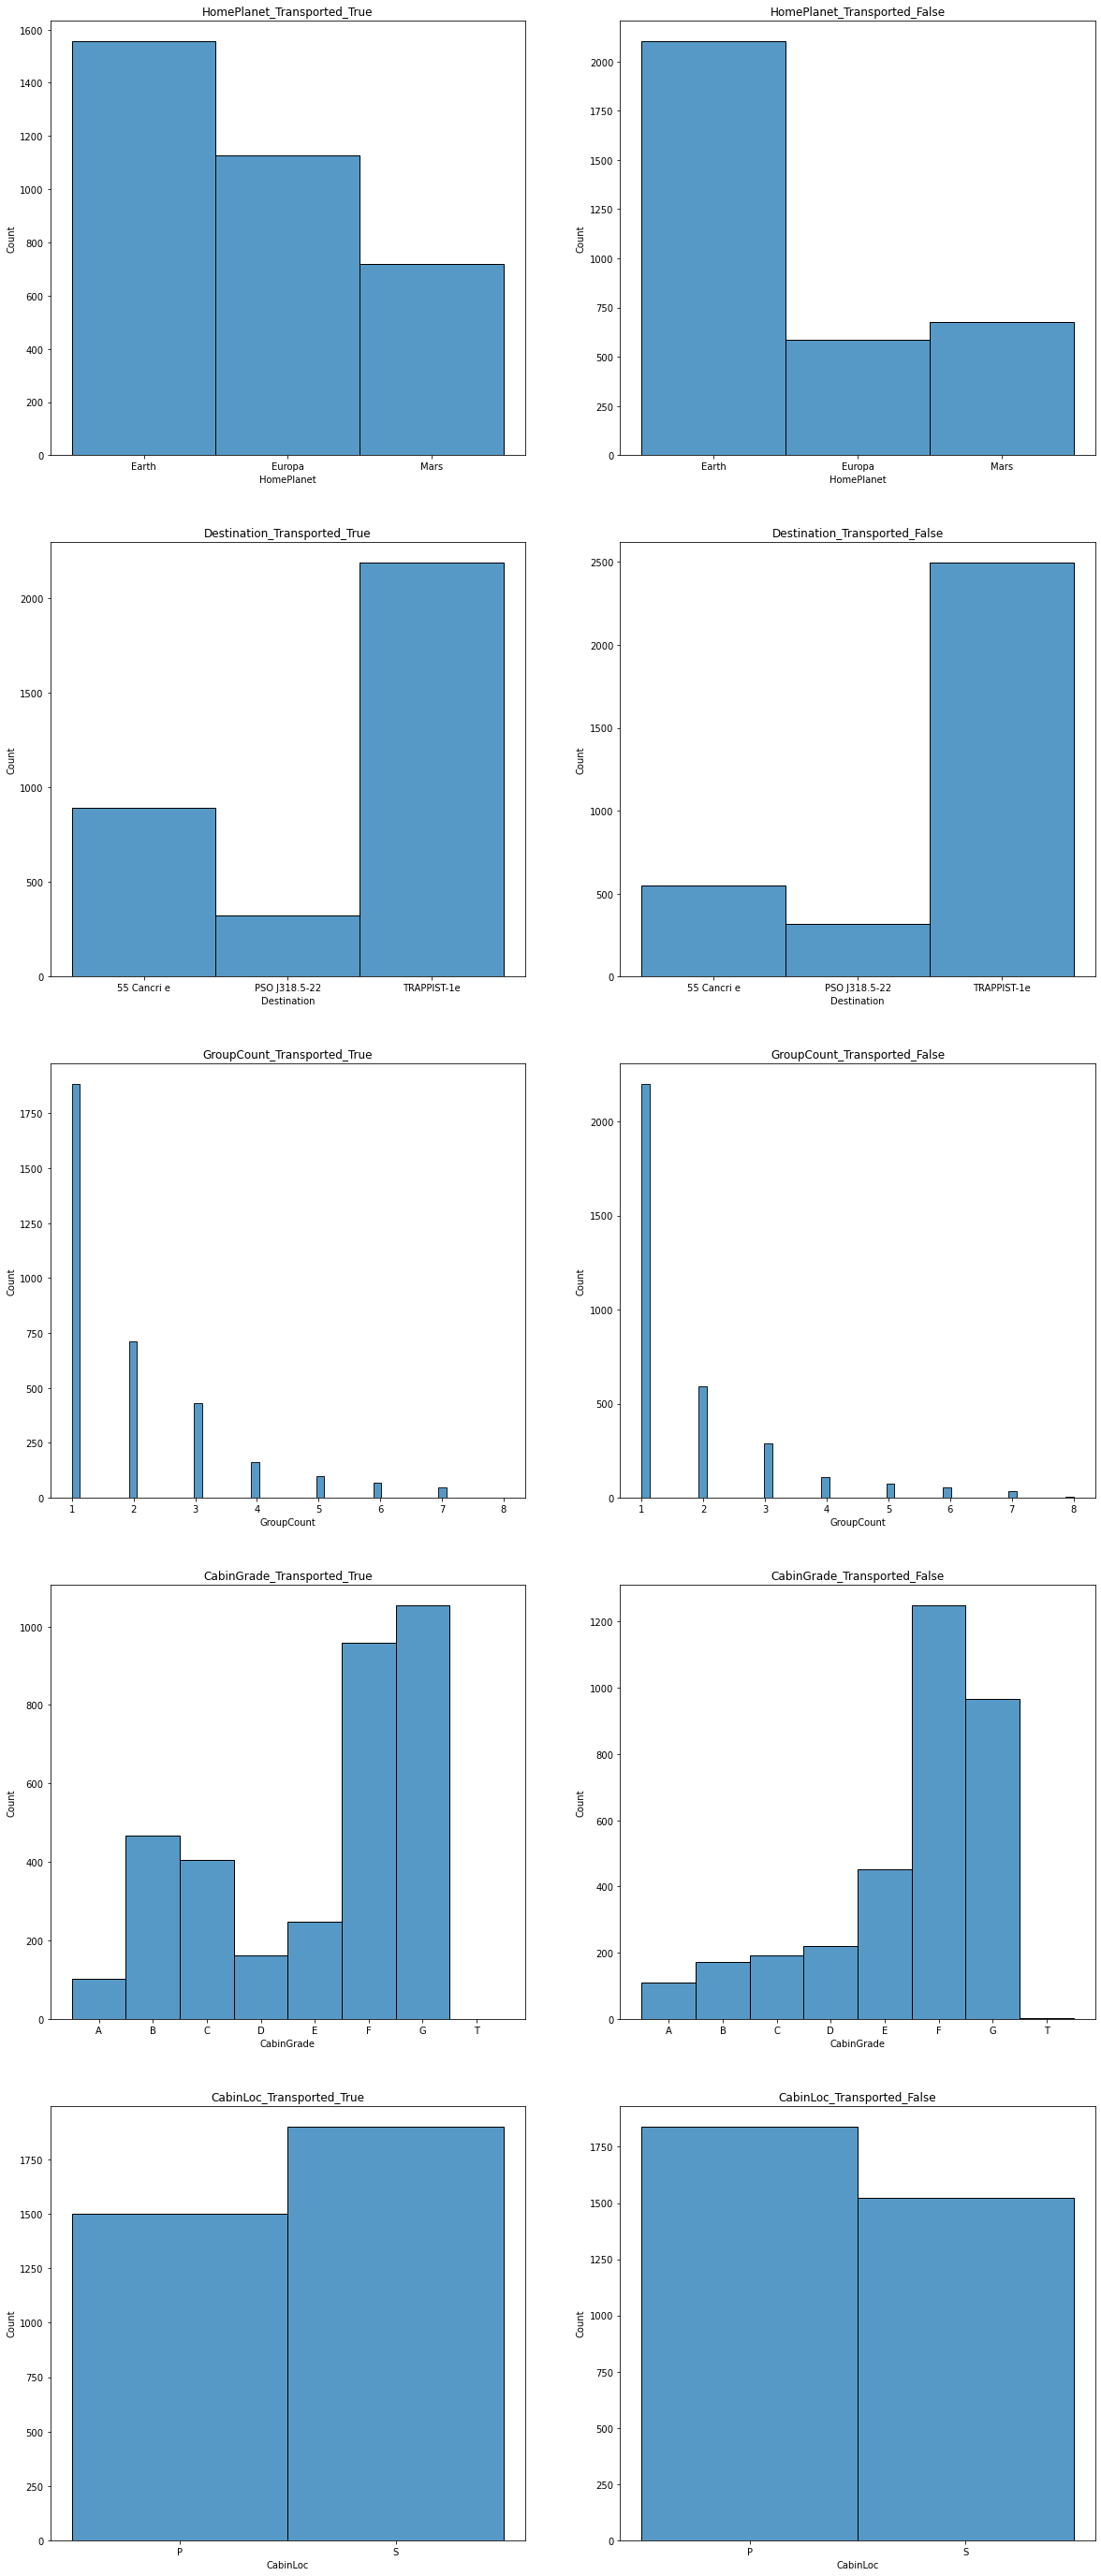

In [15]:
fig = plt.figure(figsize=(20,70))

i = 1
for col in df.drop(["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck" ,"Transported", "Underage", "CryoSleep", "VIP"], axis=1).columns:

    ax1 = fig.add_subplot(7,2,i)
    ax2 = fig.add_subplot(7,2,(i+1))

    sns.histplot(df.sort_values(col).loc[df["Transported"] == True , col], ax=ax1)
    sns.histplot(df.sort_values(col).loc[df["Transported"] == False , col], ax=ax2)

    ax1.set_title(f"{col}_Transported_True")
    ax2.set_title(f"{col}_Transported_False")

    i = i + 2

- True, False를 분리하여 그려서 생각보다 비교가 쉽지 않음 --> ylim을 맞추든 hue를 이용하여 하나의 그래프 내에 그리든 선택해야 할듯

### 숫자로 이루어진 컬럼들의 Scattering plot

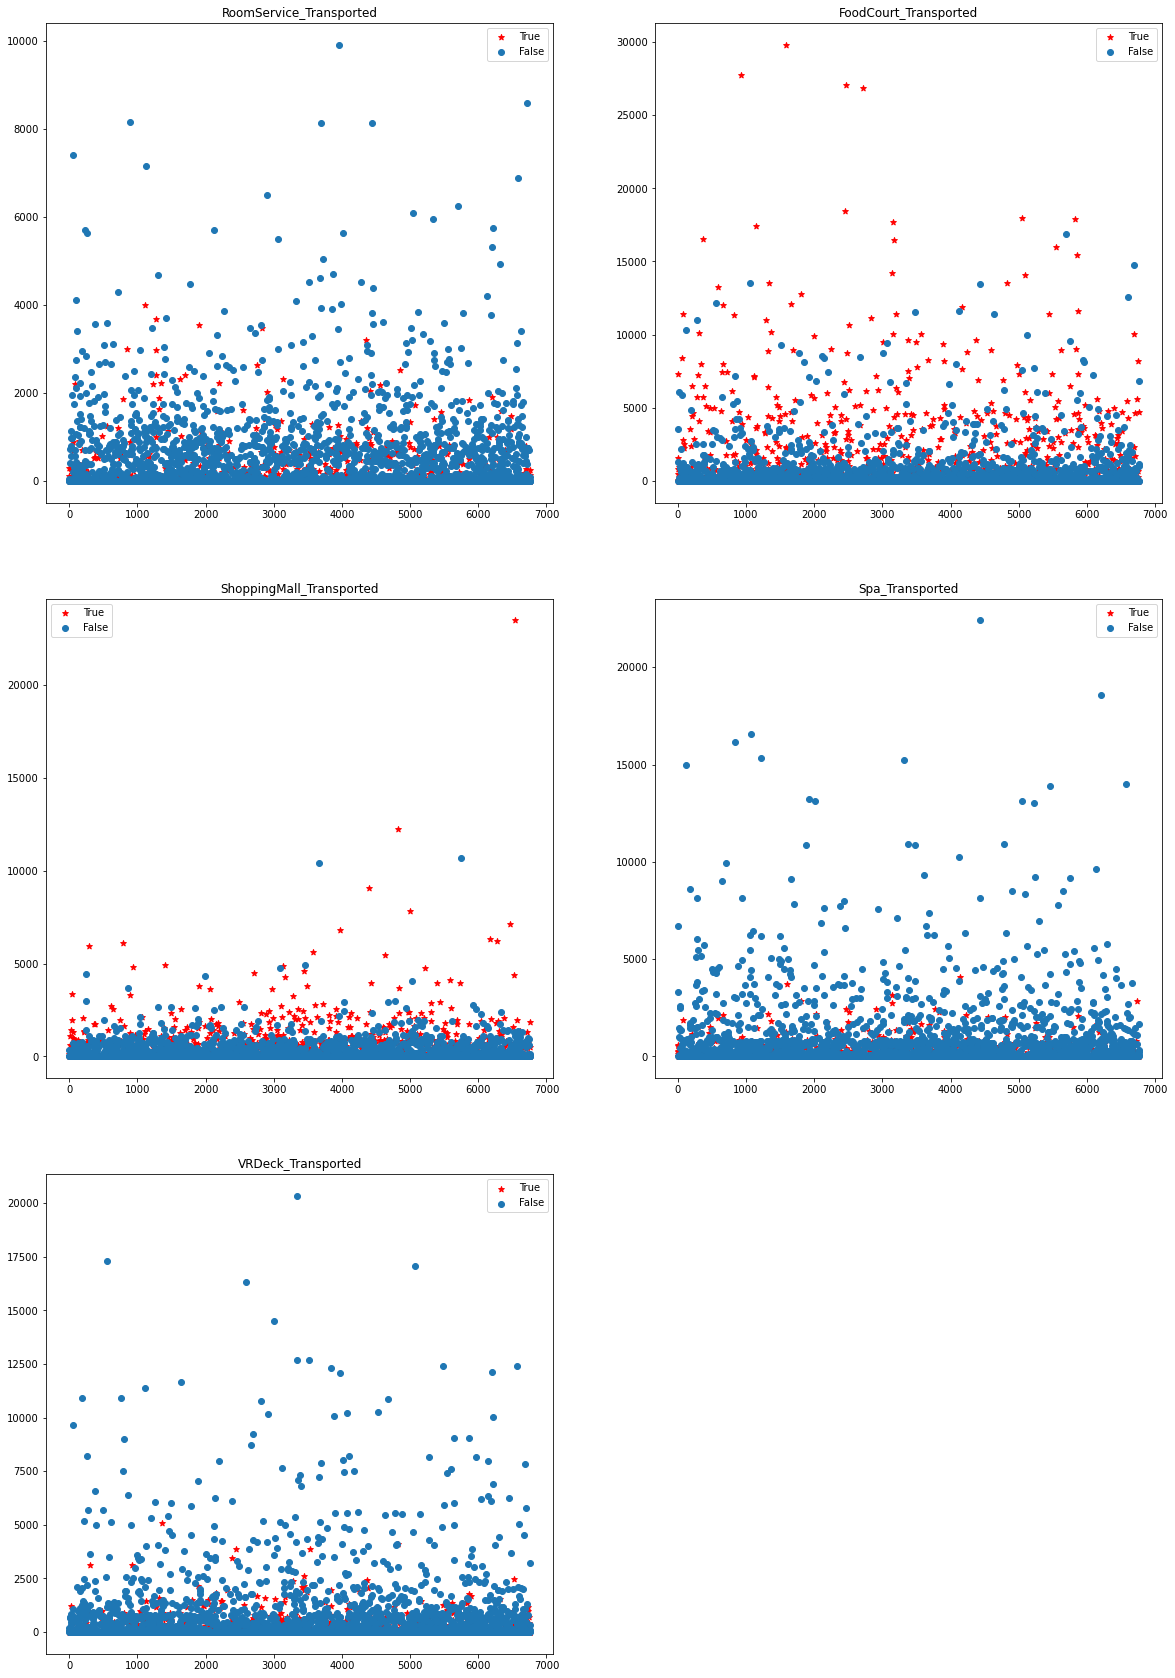

In [16]:
fig = plt.figure(figsize=(20,30))

i = 1
for col in ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]:
    ax1 = fig.add_subplot(3,2,i)

    ax1.scatter(df.sort_values("Transported")[df["Transported"] == True].index, df.sort_values("Transported").loc[df["Transported"] == True,col], c="r", marker="*")
    ax1.scatter(df.sort_values("Transported")[df["Transported"] == False].index, df.sort_values("Transported").loc[df["Transported"] == False,col])
    ax1.legend(["True","False"])
    ax1.set_title(f"{col}_Transported")
    i = i + 1

- FoodCourt와 ShoppingMall의 경우 다른 컬럼들과 다름 --> 전반적으로 Target Column이 True인 경우가 높은 숫자에 분포해있음
- 일단 두 컬럼을 포함해서 예측해보고 차후에 1순위로 제외할것